In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

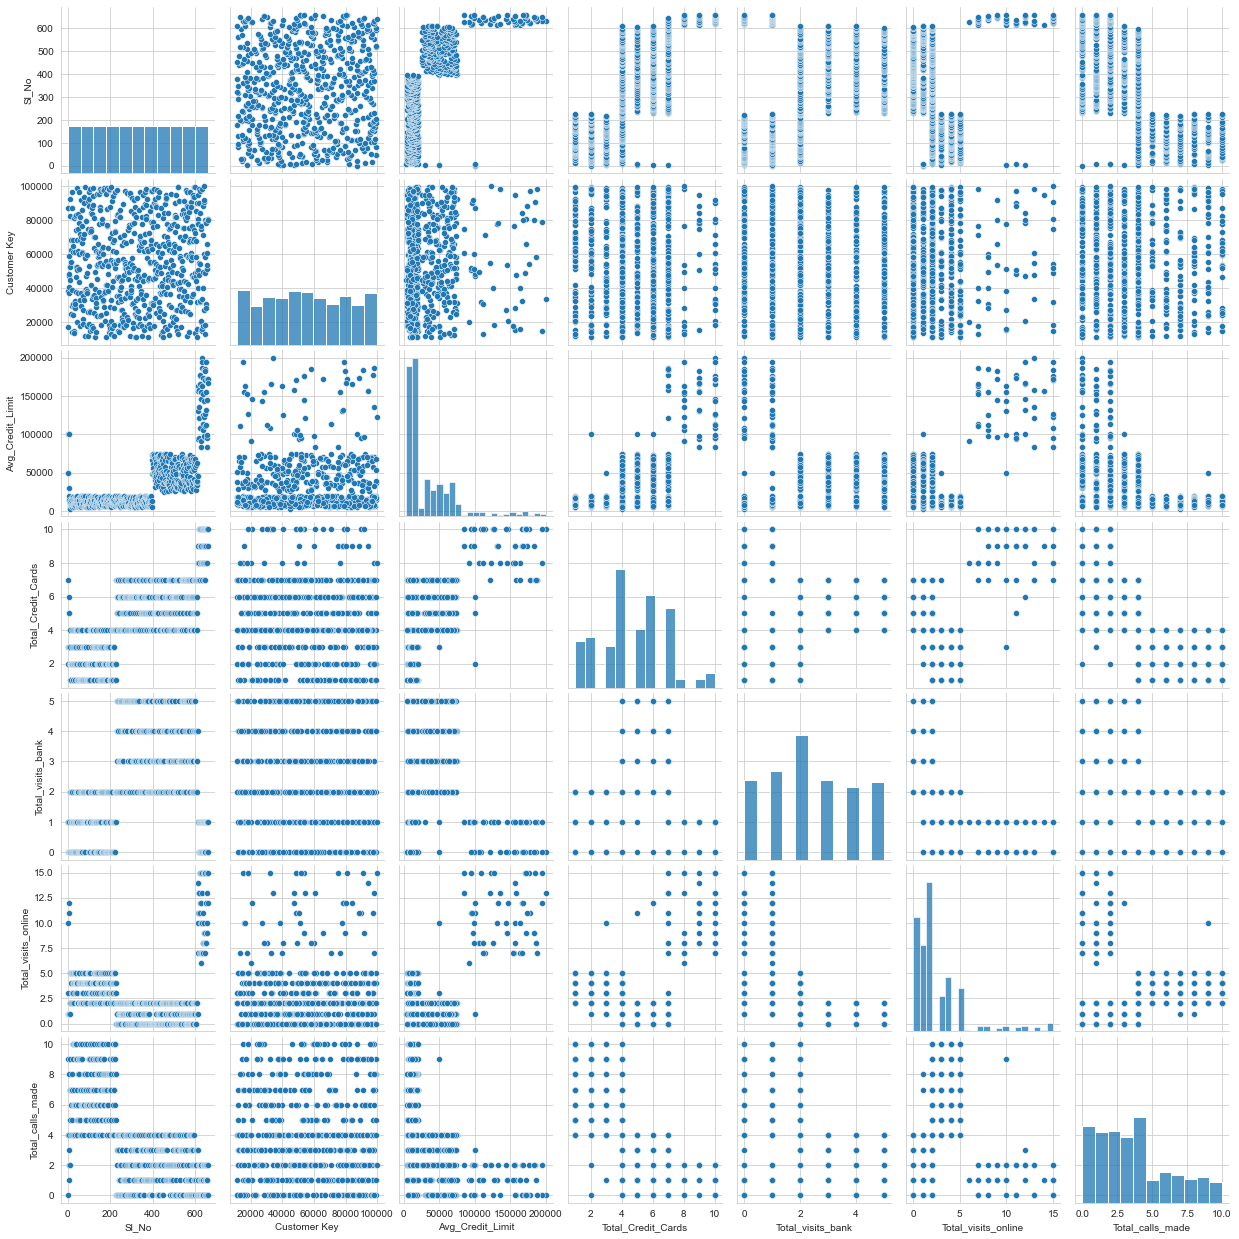

In [7]:
sns.set_style("whitegrid")
sns.pairplot(df);
plt.show()

In [8]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer



imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_data = imputer.fit_transform(df)





print(df.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


In [10]:
df.drop(["Sl_No", "Customer Key", "Avg_Credit_Limit"], axis=1 ,inplace=True)
df


,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2,1,1,0
1,3,0,10,9
2,7,1,3,4
3,5,1,1,4
4,6,0,12,3
...,...,...,...,...
655,10,1,10,0
656,10,1,13,2
657,8,1,9,1
658,10,1,15,0


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd



scaler = StandardScaler()


scaled_data = scaler.fit_transform(df)


df = pd.DataFrame(scaled_data, columns=df.columns)

print(df)

     Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0             -1.249225          -0.860451            -0.547490   
1             -0.787585          -1.473731             2.520519   
2              1.058973          -0.860451             0.134290   
3              0.135694          -0.860451            -0.547490   
4              0.597334          -1.473731             3.202298   
..                  ...                ...                  ...   
655            2.443892          -0.860451             2.520519   
656            2.443892          -0.860451             3.543188   
657            1.520613          -0.860451             2.179629   
658            2.443892          -0.860451             4.224968   
659            1.982253          -1.473731             3.202298   

     Total_calls_made  
0           -1.251537  
1            1.891859  
2            0.145528  
3            0.145528  
4           -0.203739  
..                ...  
655         -1.251537  
656

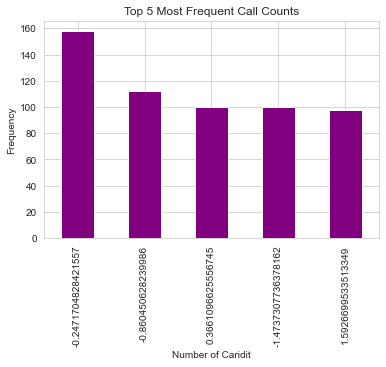

In [18]:
df['Total_visits_bank'].value_counts().head().plot(kind='bar',color='purple')
plt.xlabel('Number of Credit')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Credit Counts')
plt.show()

In [12]:
from sklearn.cluster import KMeans  

k = 2 


kmeans = KMeans(n_clusters=k, random_state=42)

#
kmeans.fit(df)  




print('centers')
print(kmeans.cluster_centers_)


centers
[[-1.0440516  -0.91496442  0.36457993  1.13589143]
 [ 0.54002669  0.47325746 -0.18857583 -0.58753005]]


E:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


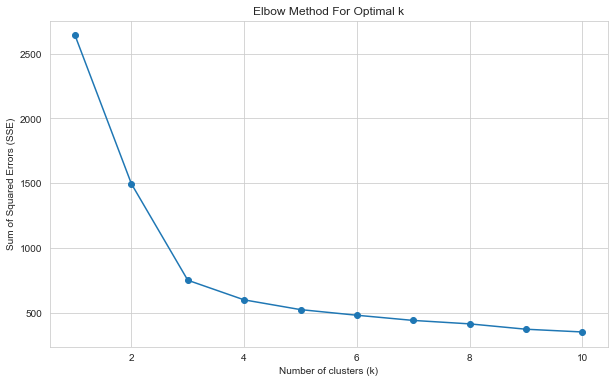

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = df.values


sse = []


k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  


plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


مراكز المجموعات:
[[-1.06291281 -0.90445279  0.32537166  1.1526047 ]
 [ 0.37188177  0.66403387 -0.55277481 -0.55119989]
 [ 1.86222621 -1.10576269  2.82731942 -0.87432983]]


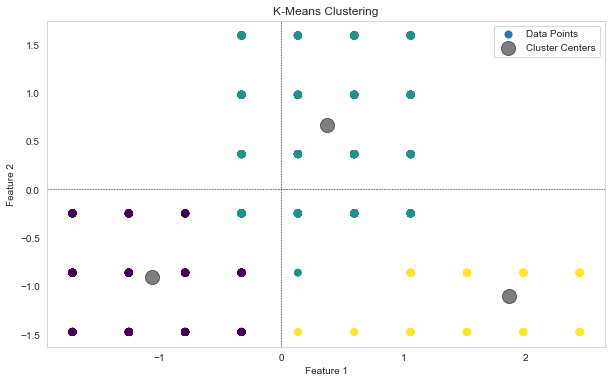

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df.values  
 
k = 3

km = KMeans(n_clusters=k, random_state=42)
km.fit(X)  


labels = km.labels_  
centers = km.cluster_centers_  


print("مراكز المجموعات:")
print(centers)


plt.figure(figsize=(10, 6))  # تحديد حجم الرسم


plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')


plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Cluster Centers')


plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='black', lw=0.5, ls='--')  
plt.axvline(0, color='black', lw=0.5, ls='--')  
plt.legend() 
plt.grid() 
plt.show() 


In [15]:
print(labels[::20])

[1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2]


In [16]:
from sklearn.metrics import silhouette_score


labels = km.labels_

# احسب Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5429682646592655
